Task 1: find the polynomial approximation for x = -5 to x = 2.1 using Newton Divided Difference method. Use centered differences.

f(x) = a0 + a1(x-x0) + a2(x-x0)(x-x1) + ... + a_n(x-x0)(x-x1)...(x-x_n-1)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x = [-5, -1, 0, 2]
y = [-2, 6, 1, 3]

In [9]:
def divided_differences(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
    
    return coef[0]

In [10]:
def newton_polynomial(x, coefficients, x_data):
    n = len(coefficients)
    result = coefficients[0]
    for i in range(1, n):
        term = coefficients[i]
        for j in range(i):
            term *= (x_data - x[j])
        result += term
    return result

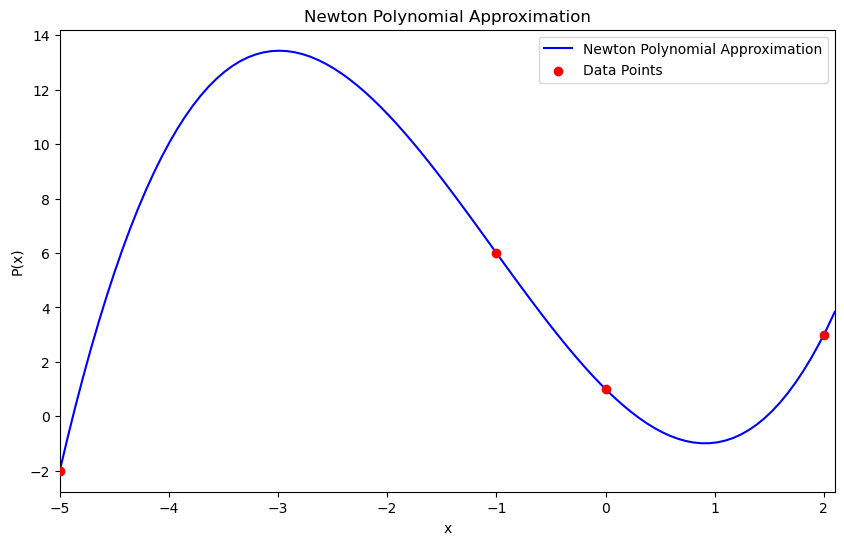

In [13]:
coefficients = divided_differences(x, y)

x_range = np.linspace(-5, 2.1, 100)
y_range = newton_polynomial(x, coefficients, x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='Newton Polynomial Approximation', color='blue')
plt.scatter(x, y, color='red', zorder=5, label='Data Points')
plt.title('Newton Polynomial Approximation')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.xlim(-5, 2.1)
plt.show()
